# Start


In [2]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [3]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("/Users/cosmina/Documents/GGM-metrics/evaluation_results/synthetic/perturbation.txt", 'r'):
    line=line.rstrip('n')
    print(line.replace('\n',''))
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)




{'activations_time': 0.17079997062683105, 'fid': 9.14963038667338e-09, 'fid_time': 0.3249471187591553, 'kid': -0.3432225, 'kid_time': 6.6055588722229, 'precision': 1.0, 'recall': 1.0, 'f1_pr': 1.00001, 'precision_time': 1.2933447360992432, 'recall_time': 1.2933447360992432, 'f1_pr_time': 1.2933447360992432, 'density': 1.2000000000000002, 'coverage': 1.0, 'f1_dc': 1.090919173552968, 'density_time': 0.9852657318115234, 'coverage_time': 0.9852657318115234, 'f1_dc_time': 0.9852657318115234, 'mmd_rbf': 2.384185791015625e-07, 'mmd_rbf_time': 1.563662052154541, 'mmd_linear': 1.1368663e-14, 'mmd_linear_time': 0.17095422744750977, 'wl_mmd': 0.0013605442176870747, 'wl_mmd_time': 2.3360331058502197, 'nspdk_mmd': -3.3306690738754696e-16, 'nspdk_mmd_time': 14.797461986541748, 'degree_mmd': 5.868990926627404e-05, 'degree_mmd_time': 22.270421, 'cluster_mmd': 4.289640286314622e-05, 'cluster_mmd_time': 24.899871, 'spectral_mmd': 0.00038791734227672237, 'spectral_mmd_time': 42.949745, 'dataset': 'lipoph

In [5]:
df=send_to_dataframe(list_of_dictionaries) 
df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
#df=df.fillna(0)
#print(df.columns)

generators_labels=['STGG','GDSS','HierVAE','MoFlow','WGAN','JTNN','train1','train2', 'train1/2+train2/2']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
structural_metrics=['nspdk_mmd','cluster_mmd', 'spectral_mmd','wl_mmd']
molecular_metrics=molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

generators=['stgg','gdss','hiervae','moflow','wgan','train1','rewired','corrupted', 'mode_dropping','mode_collapse']
df_50=df.loc[ (df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50') ]

df_mean_by_generator=df_50.groupby('generator_name').mean()
df_mean_by_dataset=df.groupby(['dataset','generator_name']).mean()

stgg=df.loc[(df.generator_name=='stgg')]
gdss=df.loc[(df.generator_name=='gdss')]
moflow=df.loc[(df.generator_name=='moflow')]
wgan=df.loc[(df.generator_name=='wgan')]
hiervae=df.loc[(df.generator_name=='hiervae')]
jtnn=df.loc[(df.generator_name=='jtnn')]
swingnn=df.loc[(df.generator_name=='swingnn')]
rewired=df.loc[(df.generator_name=='rewired')]
mode_dropping=df.loc[(df.generator_name=='mode_dropping')]
mode_collapse=df.loc[(df.generator_name=='mode_collapse')]



rewired1=df.loc[(df.generator_name=='rewired') & (df.dataset=='synthetic_1_50')]
mode_dropping1=df.loc[(df.generator_name=='mode_dropping') & (df.dataset=='synthetic_1_50') ]
corrupted1=df.loc[(df.generator_name=='corrupted') & (df.dataset=='synthetic_1_50')]
mode_collapse1=df.loc[(df.generator_name=='mode_collapse') & (df.dataset=='synthetic_1_50') ]

rewired2=df.loc[(df.generator_name=='rewired') & (df.dataset=='synthetic_2_50')]
mode_dropping2=df.loc[(df.generator_name=='mode_dropping') & (df.dataset=='synthetic_2_50') ]
corrupted2=df.loc[(df.generator_name=='corrupted') & (df.dataset=='synthetic_2_50')]
mode_collapse2=df.loc[(df.generator_name=='mode_collapse') & (df.dataset=='synthetic_2_50') ]

/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_80247/3398008922.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_by_generator=df_50.groupby('generator_name').mean()


In [27]:
df[['degree_of_perturbation'] +structural_metrics + nn_metrics].round(decimals=3)

degree_of_perturbation  nspdk_mmd  cluster_mmd  spectral_mmd  wl_mmd  \
0                     0.00     -0.000        0.000         0.000   0.001   
1                     0.05      0.000        0.001         0.000   0.001   
2                     0.10      0.001        0.005         0.001   0.001   
3                     0.15      0.003        0.010         0.002   0.001   
4                     0.25      0.008        0.026         0.005   0.001   
5                     0.33      0.014        0.043         0.008   0.001   
6                     0.45      0.026        0.077         0.015   0.001   
7                     0.50      0.033        0.102         0.019   0.001   
8                     0.65      0.054        0.162         0.030   0.001   
9                     0.70      0.062        0.180         0.036   0.001   
10                    0.75      0.073        0.211         0.041   0.001   
11                    0.85      0.094        0.278         0.053   0.001   
12                    0.90      0.104        0.307         0.061   0.001   
13                    0.95      0.116        0.341         0.067   0.001   
14                    1.00      0.129        0.382         0.074   0.001   

    precision  density  recall  coverage  f1_pr  f1_dc         fid  \
0       1.000    1.200   1.000     1.000  1.000  1.091       0.000   
1       0.964    1.148   0.998     1.000  0.981  1.069       0.694   
2       0.917    1.078   0.998     1.000  0.956  1.038       0.620   
3       0.894    1.030   0.995     1.000  0.942  1.015       2.013   
4       0.797    0.914   0.990     1.000  0.883  0.955   26885.916   
5       0.737    0.830   0.986     0.998  0.843  0.906       5.662   
6       0.648    0.690   0.987     0.994  0.783  0.815     334.614   
7       0.586    0.636   0.989     0.989  0.736  0.774      23.023   
8       0.451    0.459   0.981     0.949  0.618  0.619      36.470   
9       0.478    0.430   0.973     0.914  0.641  0.585   15843.889   
10      0.340    0.333   0.958     0.841  0.502  0.477      33.646   
11      0.278    0.221   0.946     0.634  0.430  0.328      35.801   
12      0.322    0.186   0.927     0.500  0.478  0.271  272983.702   
13      0.250    0.119   0.968     0.295  0.398  0.169      93.970   
14      0.526    0.122   0.620     0.051  0.569  0.072     412.655   

             kid  mmd_linear  mmd_rbf  
0  -3.430000e-01       0.000    0.000  
1  -2.080000e-01       0.057    0.000  
2   4.500000e-02       0.072    0.001  
3  -2.880000e-01       0.123    0.002  
4   3.091407e+10      70.155    0.006  
5  -3.720000e-01       1.072    0.010  
6   1.045239e+04      13.780    0.043  
7   2.335000e+00       4.492    0.037  
8   1.048400e+01       6.530    0.048  
9   4.236973e+08     908.646    0.023  
10  2.649000e+00      15.496    0.112  
11  5.610000e-01      15.891    0.140  
12  4.159676e+12    5683.124    0.074  
13  6.134000e+01      20.247    0.115  
14  5.202860e+02     165.943    0.310

<Axes: xlabel='degree_of_perturbation'>

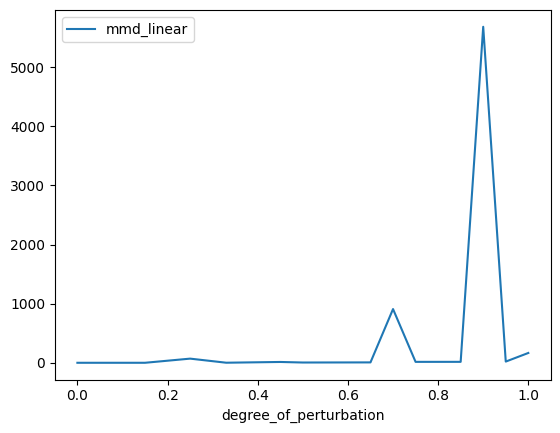

In [19]:
df.plot('degree_of_perturbation',nn_metrics[-2] )


In [55]:
df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
df['FCD/Test']


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
235    1.357278
236    2.034936
237    1.480134
238    1.378906
239    1.229961
Name: FCD/Test, Length: 240, dtype: float64

In [64]:
df_mean_by_generator[nn_metrics]


precision   density    recall  coverage     f1_pr  \
generator_name                                                         
gdss                0.733310  0.494909  0.510331  0.152119  0.577386   
hiervae             0.823880  0.581404  0.095328  0.051974  0.152778   
jtnn                0.846374  0.565044  0.151043  0.032096  0.242937   
moflow              0.787660  0.504506  0.071019  0.048708  0.120301   
stgg                0.924036  0.923608  0.869626  0.852009  0.895528   
swingnn             0.823186  0.579093  0.727350  0.343205  0.769972   
train1              1.000000  1.200502  1.000000  1.000000  1.000010   
train1/2+train2/2   0.980812  1.100762  0.982102  0.998511  0.981466   
train2              0.963155  0.986457  0.962502  0.965594  0.962833   
wgan                0.624372  0.289513  0.100004  0.015085  0.140366   

                      f1_dc           fid           kid     mmd_linear  \
generator_name                                                           
gdss               0.225301  6.551410e+01  6.791725e+00      37.424323   
hiervae            0.090685  1.836760e+02  6.939954e+01     158.016736   
jtnn               0.059814  2.215066e+02  9.680976e+01     198.119525   
moflow             0.087537  3.119891e+04  1.668119e+12     319.624178   
stgg               0.885359  1.007221e+01  8.218412e-01       1.719113   
swingnn            0.424843  2.097301e+02  9.665678e+03      52.986322   
train1             1.091126  8.458893e-10 -4.120361e-01       0.000000   
train1/2+train2/2  1.047147  5.410581e+00  2.736143e+01       0.051053   
train2             0.975813  3.061426e+00  2.969139e-02       0.152988   
wgan               0.028134  3.153649e+06  3.212228e+17  477691.579541   

                    mmd_rbf  
generator_name               
gdss               0.281360  
hiervae            0.744368  
jtnn               0.819437  
moflow             0.564807  
stgg               0.015511  
swingnn            0.273375  
train1             0.000000  
train1/2+train2/2  0.000552  
train2             0.001156  
wgan               0.658985

In [65]:
df_mean_by_generator[structural_metrics]


nspdk_mmd  cluster_mmd  spectral_mmd    wl_mmd
generator_name                                                   
gdss                0.056437     0.030545      0.018097  0.000811
hiervae             0.141269     0.001869      0.117027  0.001057
jtnn                0.157914     0.002310      0.148409  0.001055
moflow              0.188410     0.001520      0.128964  0.001086
stgg                0.003521     0.000768      0.000890  0.001075
swingnn             0.044706     0.001737      0.013766  0.001051
train1              0.000000     0.000000      0.000000  0.001049
train1/2+train2/2   0.000433     0.000040      0.000132  0.001049
train2              0.000879     0.000033      0.000289  0.001049
wgan                0.308418     0.078581      0.301764  0.001688

In [66]:
df_mean_by_generator[molecular_metrics]

valid  unique@1000  unique@10000      FCD/Test  SNN/Test  \
generator_name                                                                
gdss                 1.0     0.991167      0.987257  2.996828e+01  0.202437   
hiervae              1.0     0.352845      0.218987  3.466089e+01  0.271248   
jtnn                 1.0     0.226573      0.201588  4.249194e+01  0.234746   
moflow               1.0     0.792302      0.753671  3.962296e+01  0.205075   
stgg                 1.0     0.894012      0.879547  3.623437e+00  0.536848   
swingnn              1.0     0.969829      0.946254  2.105085e+01  0.317382   
train1               1.0     0.998894      0.998996 -3.292181e-13  1.000000   
train1/2+train2/2    1.0     0.998660      0.998368  2.165448e+00  0.786980   
train2               1.0     0.999130      0.999100  1.433003e+00  0.567297   
wgan                 1.0     0.326155      0.356127  5.160798e+01  0.114886   

                   Frag/Test  FCD/TestSF  SNN/TestSF  Frag/TestSF    IntDiv  \
generator_name                                                                
gdss                0.350434   37.120148    0.211850     0.306286  0.907220   
hiervae             0.296485   34.158070    0.218588     0.293606  0.875489   
jtnn                0.033048   41.857763    0.183167     0.031063  0.910432   
moflow              0.257783   44.321545    0.151983     0.211889  0.908970   
stgg                0.975772   15.582428    0.363267     0.819307  0.890578   
swingnn             0.671695   27.914512    0.271773     0.561893  0.905051   
train1              1.000000   13.658128    0.404695     0.867630  0.881270   
train1/2+train2/2   0.982741   14.292240    0.411512     0.835365  0.876225   
train2              0.990863   13.910872    0.405405     0.852826  0.881973   
wgan                0.000991   48.932650    0.073018     0.000090  0.813597   

                    IntDiv2   Filters      logP        SA       QED  \
generator_name                                                        
gdss               0.898787  0.255719  0.623588  2.688571  0.121853   
hiervae            0.801717  0.858450  1.877169  0.558033  0.145885   
jtnn               0.817104  0.704518  2.430426  0.413705  0.186989   
moflow             0.859673  0.362164  1.853868  2.147626  0.230938   
stgg               0.876349  0.669253  0.253371  0.439938  0.024363   
swingnn            0.891127  0.506711  0.546837  0.987945  0.115318   
train1             0.869615  0.778069  0.000000  0.000000  0.000000   
train1/2+train2/2  0.863752  0.769082  0.389806  0.130135  0.018319   
train2             0.870262  0.778650  0.084033  0.040396  0.007132   
wgan               0.712035  0.477267  2.689676  3.846659  0.245479   

                       weight   Novelty  
generator_name                           
gdss                51.037544  0.998742  
hiervae            229.673890  0.994430  
jtnn               255.095871  0.994982  
moflow             192.158638  0.996727  
stgg                26.329783  0.880795  
swingnn             93.493777  0.973811  
train1               0.000000  0.006262  
train1/2+train2/2   12.818713  0.500398  
train2               6.311252  0.996311  
wgan               460.252081  0.996543

In [67]:
df_mean_by_dataset[molecular_metrics]

valid  unique@1000  \
dataset                      generator_name                          
ames_25                      gdss                 1.0        0.670   
                             hiervae              1.0        0.145   
                             jtnn                 1.0        0.131   
                             moflow               1.0        0.635   
                             stgg                 1.0        0.915   
...                                               ...          ...   
lipophilicity_astrazeneca_50 swingnn              1.0        0.988   
                             train1               1.0        1.000   
                             train1/2+train2/2    1.0        1.000   
                             train2               1.0        1.000   
                             wgan                 1.0        0.308   

                                                unique@10000      FCD/Test  \
dataset                      generator_name                                  
ames_25                      gdss                   0.696183  1.878022e+01   
                             hiervae                0.138256           NaN   
                             jtnn                   0.113904           NaN   
                             moflow                 0.593087  2.364630e+01   
                             stgg                   0.915161  3.026482e+00   
...                                                      ...           ...   
lipophilicity_astrazeneca_50 swingnn                0.985034  2.943142e+01   
                             train1                 1.000000  1.705303e-13   
                             train1/2+train2/2      1.000000  1.229961e+00   
                             train2                 1.000000  1.935364e+00   
                             wgan                   0.287755           NaN   

                                                SNN/Test  Frag/Test  \
dataset                      generator_name                           
ames_25                      gdss               0.220026   0.393793   
                             hiervae            0.348709   0.013273   
                             jtnn               0.278590   0.000816   
                             moflow             0.331343   0.175331   
                             stgg               0.517592   0.938655   
...                                                  ...        ...   
lipophilicity_astrazeneca_50 swingnn            0.212575   0.564434   
                             train1             1.000000   1.000000   
                             train1/2+train2/2  0.786414   0.997288   
                             train2             0.564618   0.995948   
                             wgan               0.050943   0.000000   

                                                FCD/TestSF  SNN/TestSF  \
dataset                      generator_name                              
ames_25                      gdss                40.187244    0.195695   
                             hiervae                   NaN    0.139073   
                             jtnn                      NaN    0.131773   
                             moflow              45.765412    0.146722   
                             stgg                25.416512    0.298526   
...                                                    ...         ...   
lipophilicity_astrazeneca_50 swingnn             29.065307    0.251209   
                             train1               9.829002    0.431778   
                             train1/2+train2/2    9.886960    0.433314   
                             train2               9.809519    0.430976   
                             wgan                      NaN    0.065683   

                                                Frag/TestSF    IntDiv  \
dataset                      generator_name                             
ames_25                      gdss                  0.222618  0.920276   
                

#  Correlation

valid                              0.073576
unique@1000                        0.391527
unique@10000                       0.415588
FCD/Test                          -0.507539
SNN/Test                           0.285077
Frag/Test                          0.482657
FCD/TestSF                        -0.483707
SNN/TestSF                         0.491606
Frag/TestSF                        0.457638
IntDiv                             0.020522
IntDiv2                            0.195940
Filters                            0.229015
logP                              -0.462423
SA                                -0.360374
QED                               -0.400514
weight                            -0.387858
Novelty                            0.032966
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

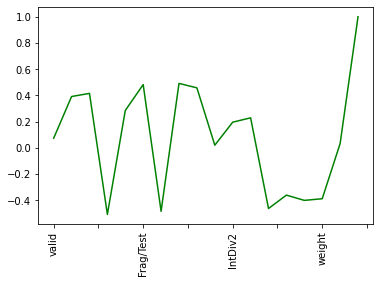

In [28]:
dft=df
molecular_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft=df[molecular_metrics].apply(pd.to_numeric)
molecular_metrics.pop()
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk']).dropna().plot(kind='line',rot=90,color="green")
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

wl_mmd                            -0.401920
nspdk_mmd                         -0.402175
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

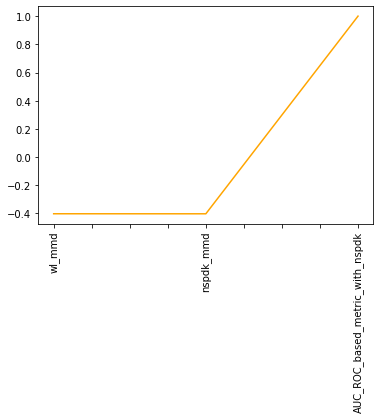

In [29]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
structural_metrics.pop()
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="orange")
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

<AxesSubplot: >

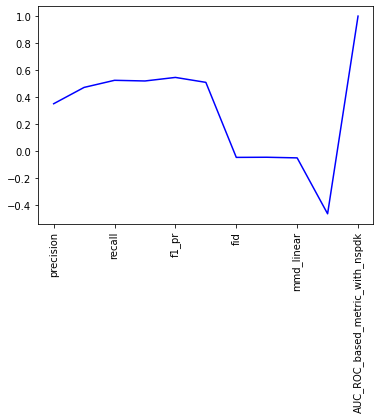

In [12]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
nn_metrics.pop()
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="blue")

In [40]:
# New metric

df['AUC_ROC_based_metric_with_nspdk']=1-df['AUC_ROC_based_metric_with_nspdk']

In [39]:
df['AUC_ROC_based_metric_with_nspdk']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.834879
         ...   
211    0.000000
212    0.000000
213    0.000000
214    0.000000
215    0.000000
Name: AUC_ROC_based_metric_with_nspdk, Length: 216, dtype: float64

In [41]:
df['AUC_ROC_based_metric_with_nspdk']

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.165121
         ...   
211    1.000000
212    1.000000
213    1.000000
214    1.000000
215    1.000000
Name: AUC_ROC_based_metric_with_nspdk, Length: 216, dtype: float64

C:\Users\cosmi\AppData\Local\Temp\ipykernel_5896\1286839258.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('generator_name').mean()[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


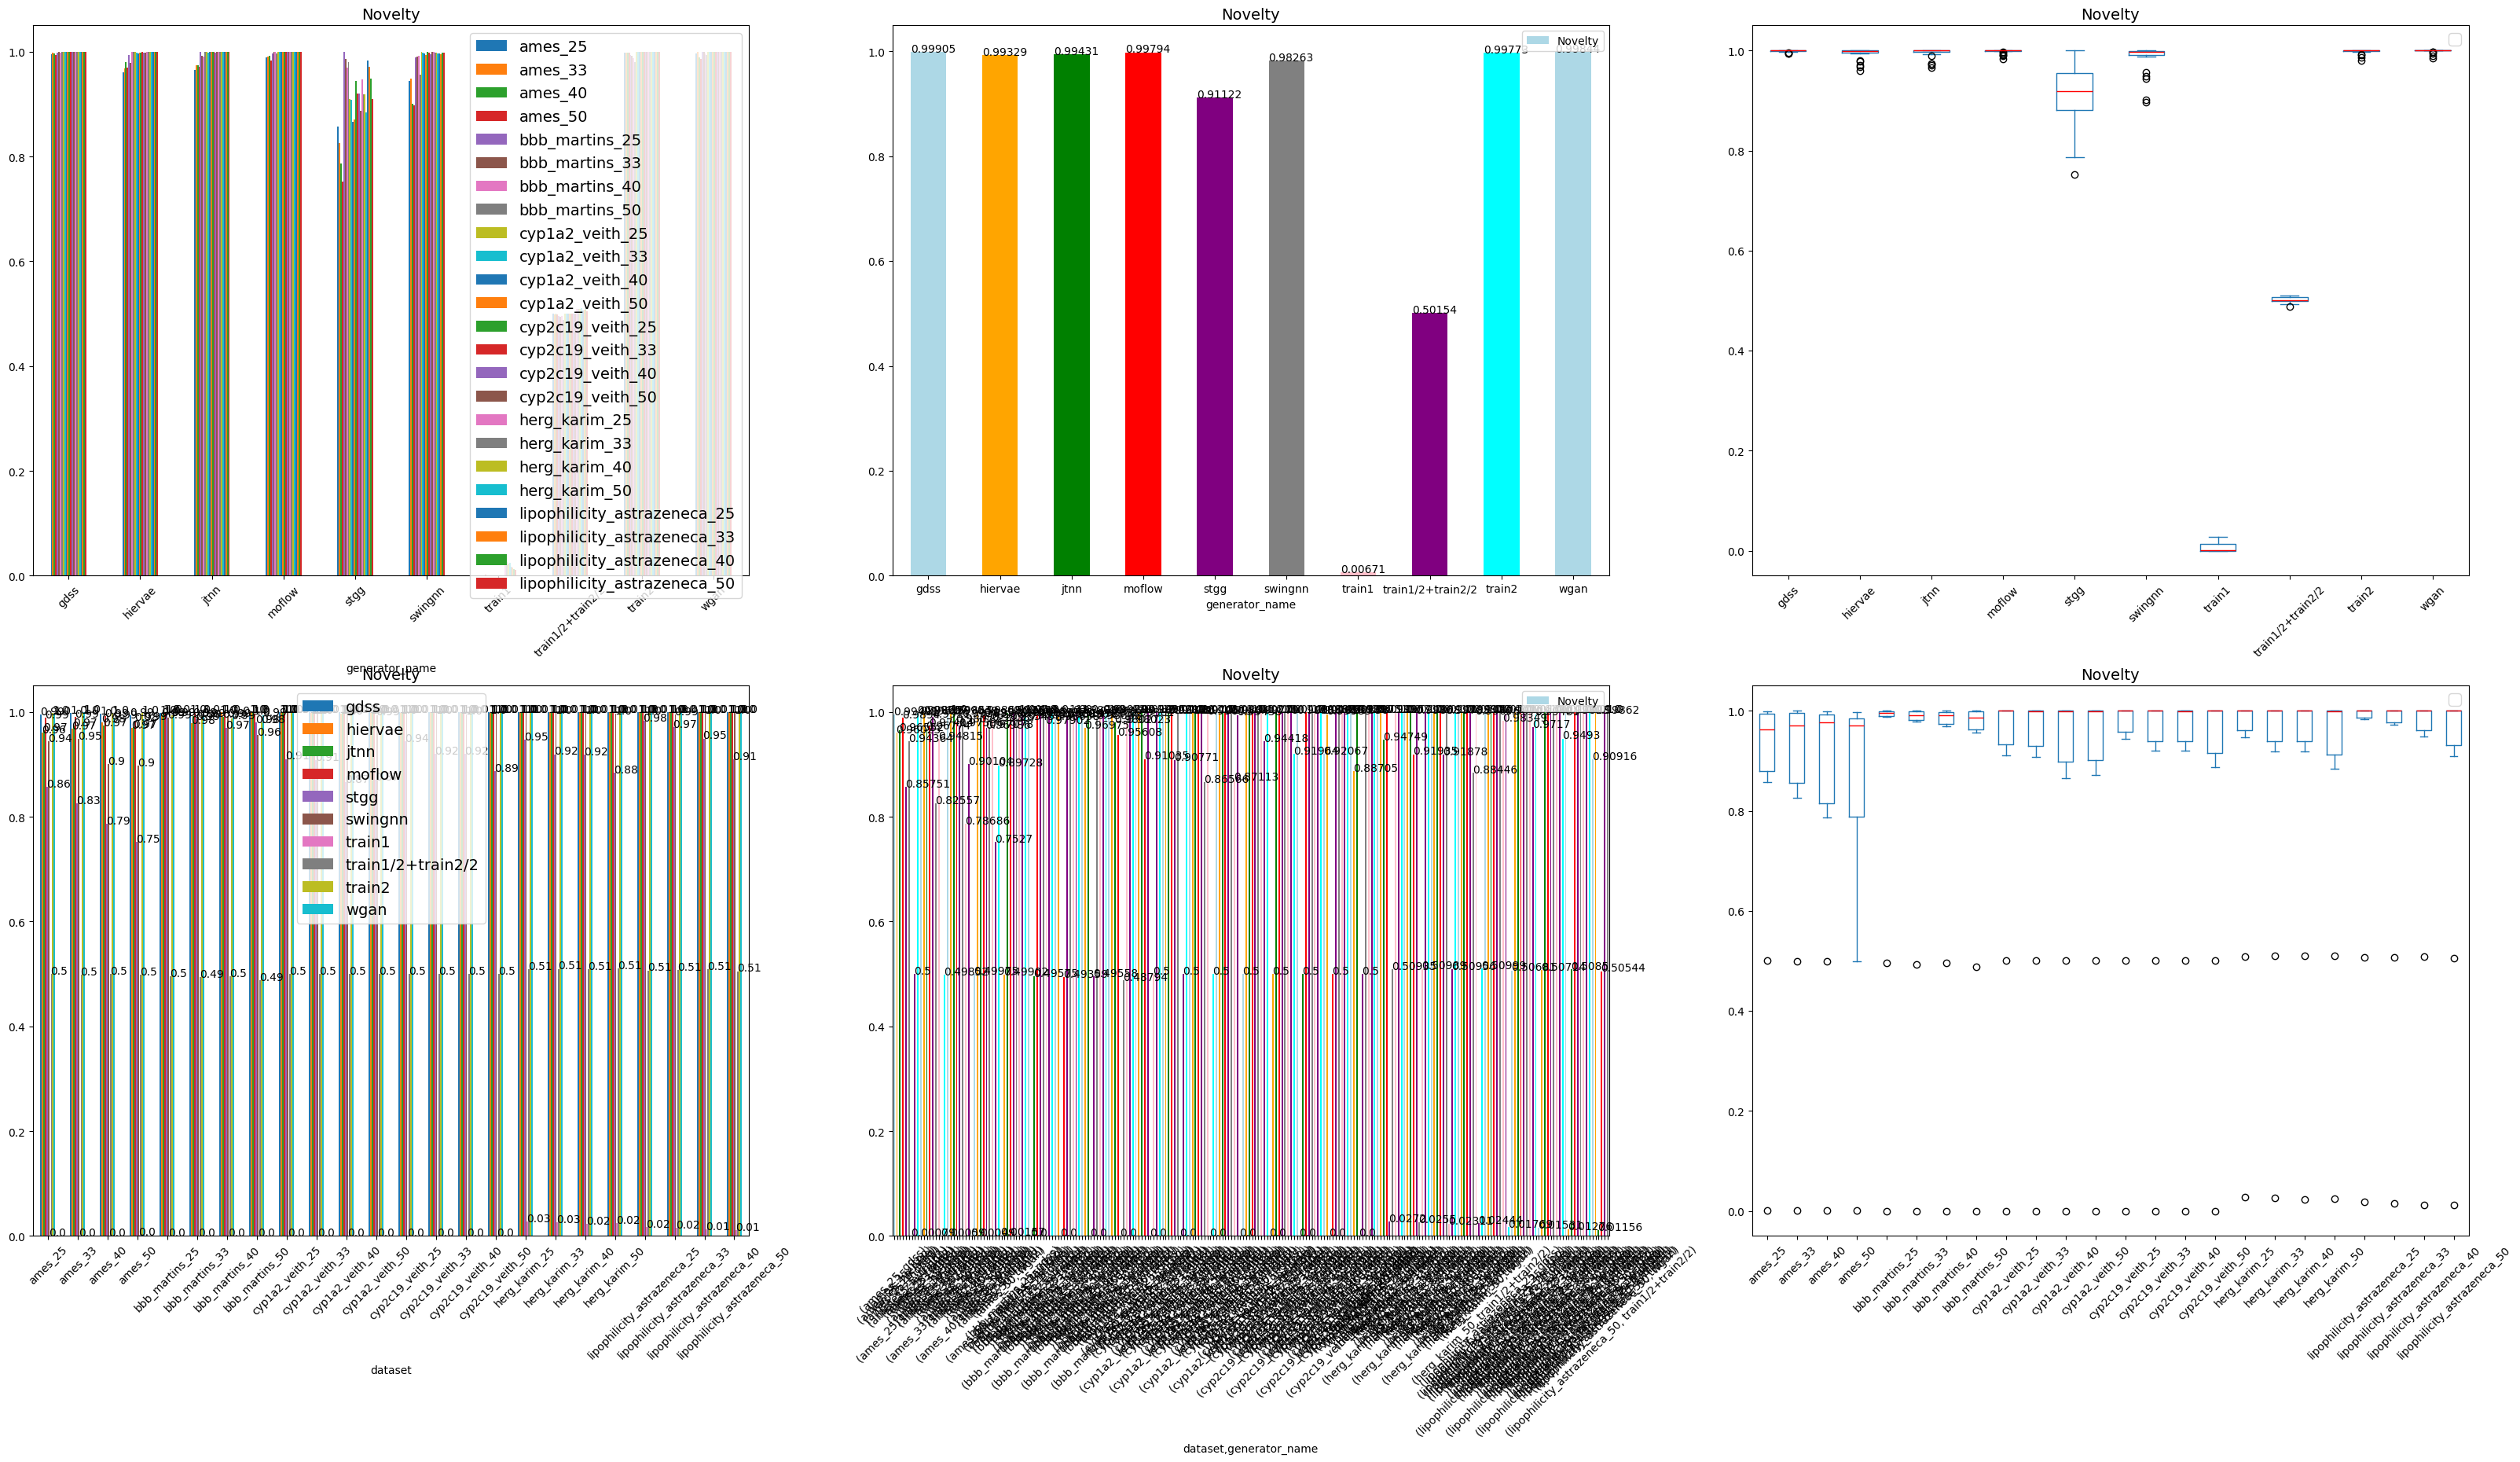

In [69]:

from matplotlib import pyplot as plt
def look_at_data_according_to_a_metric(metric_name):
    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray','pink','purple','cyan']


    fig, ax = plt.subplots(2,3,figsize=(40, 20))
    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(rot=45,ax=ax[0,0],kind='bar')
    ax[0,0].set_title(metric_name,fontsize=14)
    #ax[0,0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,0].legend(fontsize=14, loc='upper right')
    #for p in ax[0,0].patches:
        #ax[0,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))



    df.groupby('generator_name').mean()[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
    ax[0,1].legend(fontsize=10,)
    ax[0,1].set_title(metric_name,fontsize=14)
    #ax[0,1].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=

    for p in ax[0,1].patches:
        ax[0,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray','pink','purple','cyan']

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='box',rot=45,ax=ax[0,2],color=dict(medians='r'))
    ax[0,2].set_title(metric_name,fontsize=14)
    #ax[0,2].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,2].legend(fontsize=14)

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='bar',rot=45,ax=ax[1,0])
    ax[1,0].set_title(metric_name,fontsize=14)
    #ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,0].legend(fontsize=14)
    for p in  ax[1,0].patches:
        ax[1,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))


    ax[1,1]=df_mean_by_dataset[metric_name].plot.bar(ax=ax[1,1],rot=45,stacked=False,color =  c)
    ax[1,1].legend(fontsize=10)
    ax[1,1].set_title(metric_name,fontsize=14)
    #ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1,1].patches:
        ax[1,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height())  )

    
    import matplotlib

    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(rot=45,kind='box',ax=ax[1,2],color=dict(medians='r'))
    ax[1,2].set_title(metric_name,fontsize=14)
    #ax[1,2].set_xticklabels(datasets,fontdict={'fontsize':14})
    #ax[1,2].set_label(generators_labels)
    ax[1,2].legend(fontsize=14)

    



look_at_data_according_to_a_metric('Novelty')




In [34]:
df[['dataset','generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']]

dataset generator_name  \
0                         ames_25        hiervae   
1                         ames_33        hiervae   
2                         ames_40        hiervae   
3                         ames_50        hiervae   
4                  bbb_martins_25        hiervae   
..                            ...            ...   
211                 herg_karim_50         train1   
212  lipophilicity_astrazeneca_25         train1   
213  lipophilicity_astrazeneca_33         train1   
214  lipophilicity_astrazeneca_40         train1   
215  lipophilicity_astrazeneca_50         train1   

     AUC_ROC_based_metric_with_nspdk  AUC_ROC_based_metric_with_nspdk_time  
0                           0.000000                             27.996322  
1                           0.000000                             43.022686  
2                           0.000000                             39.524141  
3                           0.000000                             49.816979  
4                           0.834879                             10.295381  
..                               ...                                   ...  
211                         0.000000                            164.679436  
212                         0.000000                             24.398643  
213                         0.000000                             36.311709  
214                         0.000000                             33.657414  
215                         0.000000                             38.024511  

[216 rows x 4 columns]

## New metrics's Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


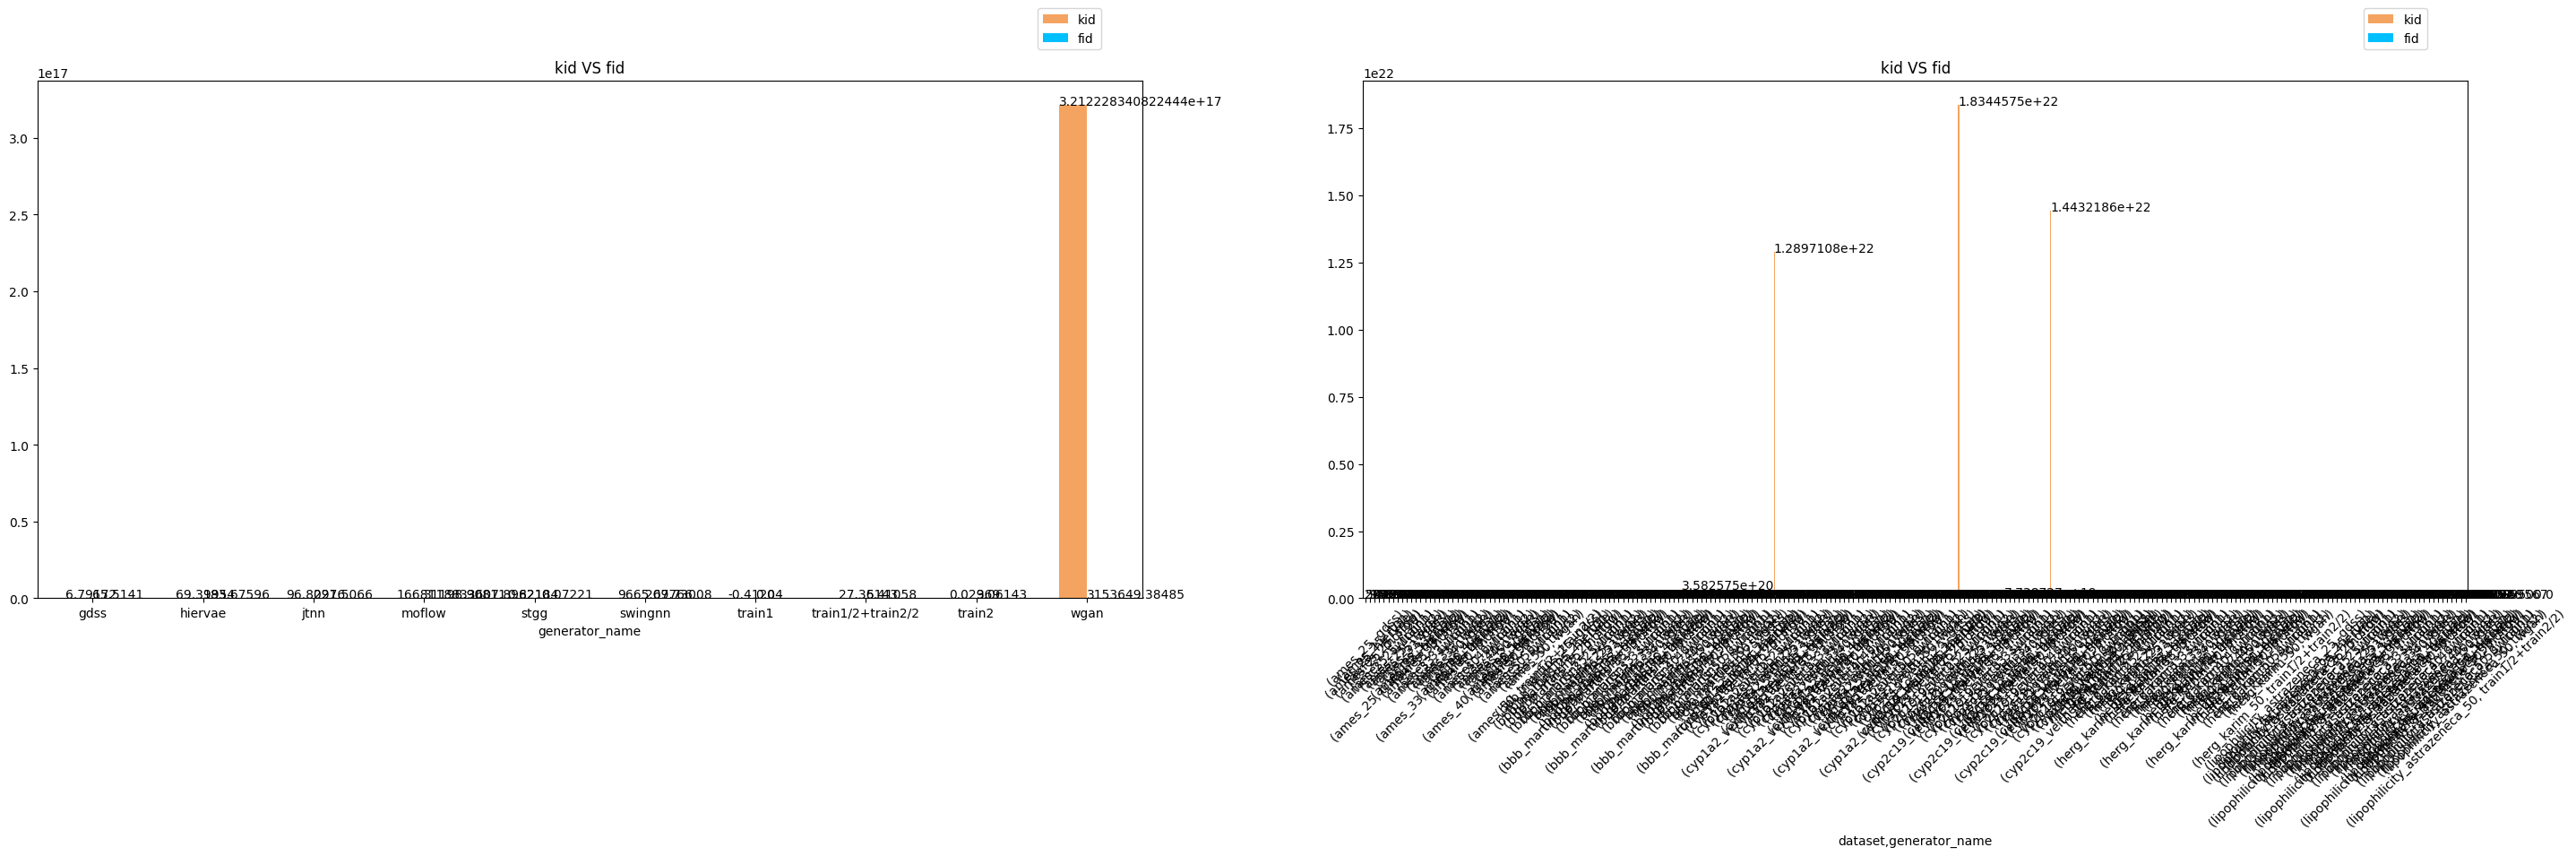

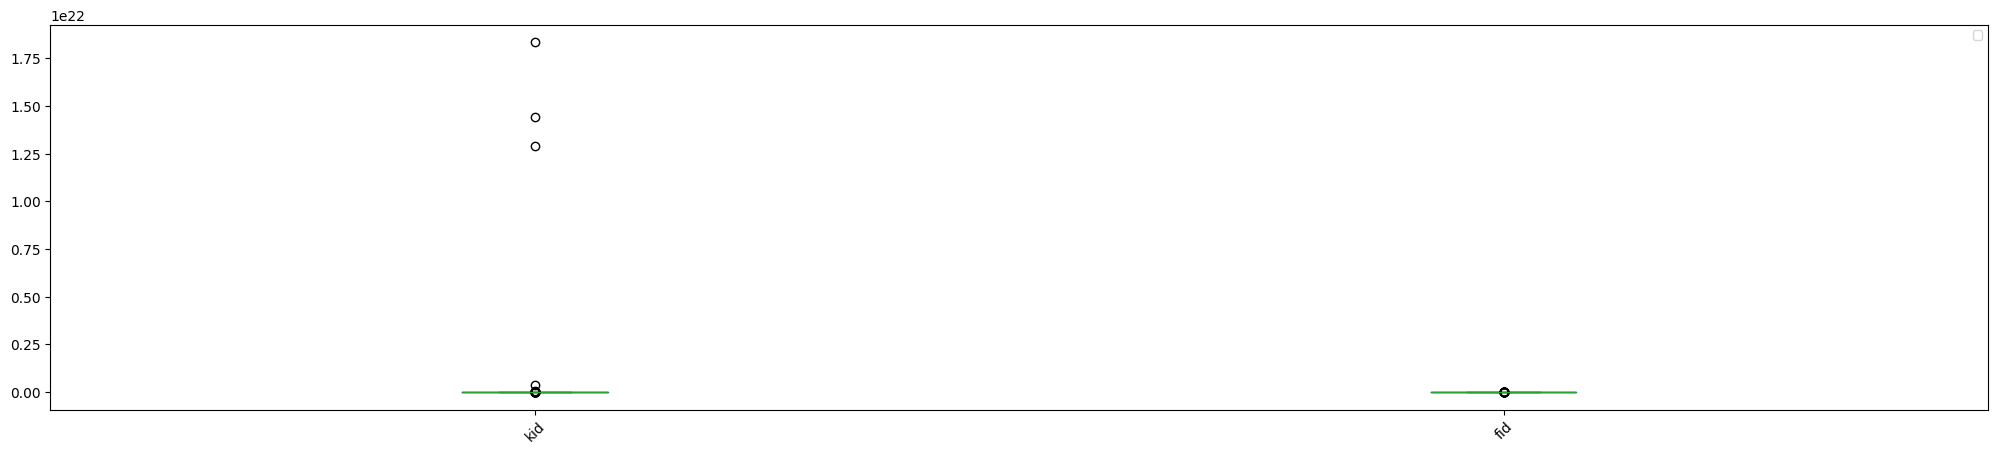

In [70]:
def compare_two_metrics(metric1, metric2,time=False):
    fix,ax=plt.subplots(1,2,figsize=(35,7.5))
    df_mean_by_generator[[metric1,metric2]].plot.bar(ax=ax[0],rot=0,stacked=False,color={'deepskyblue','sandybrown'})
    ax[0].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[0].set_title(metric1+' VS ' +metric2)
    #ax[0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[0].patches:
        ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    #plt.subplots_adjust(right=1.5)

    df_mean_by_dataset[[metric1,metric2]].plot.bar(ax=ax[1],rot=45,stacked=False,color={'deepskyblue','sandybrown'})
    ax[1].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[1].set_title(metric1+' VS ' +metric2)
    #ax[1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1].patches:
        ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    
    fix,ax=plt.subplots(figsize=(25  ,5))

    ax=df[[metric1, metric2]].plot(ax=ax,subplots=False,rot=45,kind='box')
    plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
    
    if time:

            fix,ax=plt.subplots(1,2,figsize=(35,7.5))

            ax[1]=df_mean_by_dataset[[metric2+'_time',metric1+'_time']].plot(ax=ax[1],subplots=False,rot=90,kind='bar')
            #ax[1].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[1].patches:
                ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))

            ax[0]=df_mean_by_generator[[metric2+'_time',metric1+'_time']].plot(ax=ax[0],subplots=False,rot=90,kind='bar')
            #ax[0].set_xticklabels(labels=generators_labels,fontdict={'fontsize':12 }, rotation=0)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[0].patches:
                ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
            fix,ax=plt.subplots(figsize=(25  ,5))

            ax=df[[metric2+'_time',metric1+'_time']].plot(ax=ax,subplots=False,rot=45,kind='box')
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
compare_two_metrics('kid','fid',time=False)



# Molecular metrics

In [78]:
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess
from evaluation.moses.metrics.utils  import logP, QED, SA,weight
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict
import pandas as pd

In [80]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

## Distribution of  QED, logP, SA and molecular weight  properties 




In [81]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
dfs=[]
for dataset_name in current_smiles_datasets:
    for split in splits:
        smiles = []
        with open('data/smiles/{}/train1_smiles.txt'.format(dataset_name + split)) as my_file:
            for line in my_file:
                smiles.append(line.strip())
        train1_graphs=smiles
        mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
        log_p =[logP(mol) for mol in mols]
        qeds= [QED(mol) for mol in mols]
        sas= [SA(mol) for mol in mols]
        weights=[weight(mol) for mol in mols]
        d1={'generator':'traib1','dataset':dataset_name + split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
        dfs.append(pd.DataFrame(data=d1))

        

In [82]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
generators=['gdss','stgg','hiervae','moflow','wgan','jtnn','swingnn']
gens=[]
for generator_name in generators:
     for dataset_name in current_smiles_datasets:
                for split in splits:

                        print(generator_name,dataset_name+split)
                        pos_list, neg_list=[],[]
                        path_postives='data/smiles/{}/{}_gen_pos_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_postives) as my_file:
                                for line in my_file:
                                        pos_list.append(line.strip())
                        path_negatives='data/smiles/{}/{}_gen_neg_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_negatives) as my_file:
                                for line in my_file:
                                        neg_list.append(line.strip())
                        smiles=pos_list+neg_list
                        train1_graphs=smiles
                        try:
                                
                                mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
                                log_p =[logP(mol) for mol in mols]
                                qeds= [QED(mol) for mol in mols]
                                sas= [SA(mol) for mol in mols]
                                weights=[weight(mol) for mol in mols]
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
                                gens.append(pd.DataFrame(data=d1))

                        except:
                                mols =0
                                log_p =0
                                qeds= 0
                                sas= 0
                                weights=0
                        
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':[log_p], 'qed':[qeds],'SAS':[sas],'weight':[weights]}
                                gens.append(pd.DataFrame(data=d1))

              
              
                

gdss ames_25
gdss ames_33


[14:08:28] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:08:32] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


gdss ames_40
gdss ames_50
gdss bbb_martins_25
gdss bbb_martins_33
gdss bbb_martins_40
gdss bbb_martins_50
gdss cyp1a2_veith_25
gdss cyp1a2_veith_33


[14:09:22] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:09:31] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


gdss cyp1a2_veith_40
gdss cyp1a2_veith_50
gdss cyp2c19_veith_25
gdss cyp2c19_veith_33


[14:10:15] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:10:22] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


gdss cyp2c19_veith_40
gdss cyp2c19_veith_50
gdss herg_karim_25
gdss herg_karim_33
gdss herg_karim_40
gdss herg_karim_50
gdss lipophilicity_astrazeneca_25
gdss lipophilicity_astrazeneca_33


[14:12:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:12:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:12:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:12:59] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:13:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:13:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


gdss lipophilicity_astrazeneca_40
gdss lipophilicity_astrazeneca_50
stgg ames_25
stgg ames_33
stgg ames_40
stgg ames_50
stgg bbb_martins_25
stgg bbb_martins_33
stgg bbb_martins_40
stgg bbb_martins_50
stgg cyp1a2_veith_25
stgg cyp1a2_veith_33
stgg cyp1a2_veith_40
stgg cyp1a2_veith_50
stgg cyp2c19_veith_25
stgg cyp2c19_veith_33
stgg cyp2c19_veith_40
stgg cyp2c19_veith_50
stgg herg_karim_25
stgg herg_karim_33
stgg herg_karim_40
stgg herg_karim_50
stgg lipophilicity_astrazeneca_25
stgg lipophilicity_astrazeneca_33
stgg lipophilicity_astrazeneca_40
stgg lipophilicity_astrazeneca_50
hiervae ames_25
hiervae ames_33
hiervae ames_40
hiervae ames_50
hiervae bbb_martins_25
hiervae bbb_martins_33
hiervae bbb_martins_40
hiervae bbb_martins_50
hiervae cyp1a2_veith_25
hiervae cyp1a2_veith_33
hiervae cyp1a2_veith_40
hiervae cyp1a2_veith_50
hiervae cyp2c19_veith_25
hiervae cyp2c19_veith_33
hiervae cyp2c19_veith_40
hiervae cyp2c19_veith_50
hiervae herg_karim_25
hiervae herg_karim_33
hiervae herg_karim_4

[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not removing hydrogen atom without neighbors
[14:18:23] WARNING: not r

moflow ames_33


[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not removing hydrogen atom without neighbors
[14:18:25] WARNING: not r

moflow ames_40


[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not removing hydrogen atom without neighbors
[14:18:28] WARNING: not r

moflow ames_50


[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not r

moflow bbb_martins_25
moflow bbb_martins_33
moflow bbb_martins_40
moflow bbb_martins_50
moflow cyp1a2_veith_25
moflow cyp1a2_veith_33


[14:18:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:18:44] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


moflow cyp1a2_veith_40
moflow cyp1a2_veith_50
moflow cyp2c19_veith_25
moflow cyp2c19_veith_33


[14:19:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:09] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


moflow cyp2c19_veith_40


[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:15] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:19:15] WARNING: could not find number of expected rings. Switching to an approximate ring fi

moflow cyp2c19_veith_50
moflow herg_karim_25


[14:19:30] SMILES Parse Error: syntax error while parsing: FCCC=CC=l
[14:19:30] SMILES Parse Error: Failed parsing SMILES 'FCCC=CC=l' for input: 'FCCC=CC=l'
[14:19:30] SMILES Parse Error: syntax error while parsing: CCC==C=CCCC=CCCCCC=NCC
[14:19:30] SMILES Parse Error: Failed parsing SMILES 'CCC==C=CCCC=CCCCCC=NCC' for input: 'CCC==C=CCCC=CCCCCC=NCC'
[14:19:30] SMILES Parse Error: unclosed ring for input: 'CCCCCCCCCCCCCCCC=CC1C'
[14:19:30] Explicit valence for atom # 19 Cl, 2, is greater than permitted
[14:19:30] SMILES Parse Error: syntax error while parsing: =CCCCCCCCCC=CCCCC=CCCCF
[14:19:30] SMILES Parse Error: Failed parsing SMILES '=CCCCCCCCCC=CCCCC=CCCCF' for input: '=CCCCCCCCCC=CCCCC=CCCCF'
[14:19:30] SMILES Parse Error: syntax error while parsing: CCCCCCCCNCCNCCCCCCC#
[14:19:30] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCNCCNCCCCCCC#' for input: 'CCCCCCCCNCCNCCCCCCC#'


moflow herg_karim_33
moflow herg_karim_40
moflow herg_karim_50
moflow lipophilicity_astrazeneca_25


[14:19:59] WARNING: not removing hydrogen atom without neighbors
[14:19:59] WARNING: not removing hydrogen atom without neighbors
[14:20:01] WARNING: not removing hydrogen atom without neighbors
[14:20:01] WARNING: not removing hydrogen atom without neighbors


moflow lipophilicity_astrazeneca_33


[14:20:01] WARNING: not removing hydrogen atom without neighbors
[14:20:01] WARNING: not removing hydrogen atom without neighbors
[14:20:01] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors


moflow lipophilicity_astrazeneca_40


[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not removing hydrogen atom without neighbors
[14:20:03] WARNING: not r

moflow lipophilicity_astrazeneca_50


[14:20:05] WARNING: not removing hydrogen atom without neighbors
[14:20:05] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors


wgan ames_25


[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not removing hydrogen atom without neighbors
[14:20:08] WARNING: not r

wgan ames_33


[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not removing hydrogen atom without neighbors
[14:20:10] WARNING: not r

wgan ames_40


[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: not removing hydrogen atom without neighbors
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:13] WARNING: not removing hydrogen atom without neighbors
[14:20:13] WARNING: not removing hydrogen atom without neighbors
[14:20:13] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:14] WAR

wgan ames_50


[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not removing hydrogen atom without neighbors
[14:20:15] WARNING: not r

wgan bbb_martins_25


[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:18] WARNING: not r

wgan bbb_martins_33


[14:20:18] WARNING: not removing hydrogen atom without neighbors
[14:20:19] WARNING: not removing hydrogen atom without neighbors
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an ap

wgan bbb_martins_40


[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: not removing hydrogen atom without neighbors
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:19] WARNING: could not f

wgan bbb_martins_50


[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not removing hydrogen atom without neighbors
[14:20:27] WARNING: not r

wgan cyp1a2_veith_25


[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen atom without neighbors
[14:20:28] WARNING: not removing hydrogen 

wgan cyp1a2_veith_33


[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:20:35] WARNING: could not find number of expected rings. Switching to an approximate ring fi

wgan cyp1a2_veith_40


[14:21:14] WARNING: not removing hydrogen atom without neighbors
[14:21:14] WARNING: not removing hydrogen atom without neighbors
[14:21:16] WARNING: not removing hydrogen atom without neighbors
[14:21:17] WARNING: not removing hydrogen atom without neighbors


wgan cyp1a2_veith_50


[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:21:19] WARNING: could not find number of expected rings. Switching to an approximate ring fi

wgan cyp2c19_veith_25


[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:23:40] WARNING: could not find number of expected rings. Switching to an approximate ring fi

wgan cyp2c19_veith_33


[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not removing hydrogen atom without neighbors
[14:24:27] WARNING: not r

wgan cyp2c19_veith_40


[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:10] WARNING: could not find number of expected rings. Switching to an approximate ring fi

wgan cyp2c19_veith_50


[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not removing hydrogen atom without neighbors
[14:25:14] WARNING: not r

wgan herg_karim_25


[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neighbors
[14:25:20] WARNING: not removing hydrogen atom without neig

wgan herg_karim_33


[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not removing hydrogen atom without neighbors
[14:25:24] WARNING: not r

wgan herg_karim_40


[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not removing hydrogen atom without neighbors
[14:25:28] WARNING: not r

wgan herg_karim_50


[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neighbors
[14:25:33] WARNING: not removing hydrogen atom without neig

wgan lipophilicity_astrazeneca_25


[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not removing hydrogen atom without neighbors
[14:25:38] WARNING: not r

wgan lipophilicity_astrazeneca_33


[14:25:39] WARNING: not removing hydrogen atom without neighbors
[14:25:39] WARNING: not removing hydrogen atom without neighbors
[14:25:39] WARNING: not removing hydrogen atom without neighbors
[14:25:39] WARNING: not removing hydrogen atom without neighbors
[14:25:40] WARNING: not removing hydrogen atom without neighbors
[14:25:40] WARNING: not removing hydrogen atom without neighbors
[14:25:40] WARNING: not removing hydrogen atom without neighbors
[14:25:40] WARNING: not removing hydrogen atom without neighbors


wgan lipophilicity_astrazeneca_40


[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neighbors
[14:25:41] WARNING: not removing hydrogen atom without neig

wgan lipophilicity_astrazeneca_50


[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[14:25:43] WARNING: not removing hydrogen atom without neighbors
[14:25:43] WARNING: not removing hydrogen atom without neighbors
[14:25:43] WARNING: could not find number of expected rings. Switching to an ap

jtnn ames_25
jtnn ames_33
jtnn ames_40
jtnn ames_50
jtnn bbb_martins_25
jtnn bbb_martins_33
jtnn bbb_martins_40
jtnn bbb_martins_50
jtnn cyp1a2_veith_25
jtnn cyp1a2_veith_33
jtnn cyp1a2_veith_40
jtnn cyp1a2_veith_50
jtnn cyp2c19_veith_25
jtnn cyp2c19_veith_33
jtnn cyp2c19_veith_40
jtnn cyp2c19_veith_50
jtnn herg_karim_25
jtnn herg_karim_33
jtnn herg_karim_40
jtnn herg_karim_50
jtnn lipophilicity_astrazeneca_25
jtnn lipophilicity_astrazeneca_33
jtnn lipophilicity_astrazeneca_40
jtnn lipophilicity_astrazeneca_50
swingnn ames_25
swingnn ames_33


[14:27:19] WARNING: not removing hydrogen atom without neighbors
[14:27:22] WARNING: not removing hydrogen atom without neighbors


swingnn ames_40


[14:27:23] WARNING: not removing hydrogen atom without neighbors
[14:27:23] WARNING: not removing hydrogen atom without neighbors
[14:27:25] WARNING: not removing hydrogen atom without neighbors
[14:27:27] WARNING: not removing hydrogen atom without neighbors


swingnn ames_50
swingnn bbb_martins_25


[14:27:35] WARNING: not removing hydrogen atom without neighbors
[14:27:35] WARNING: not removing hydrogen atom without neighbors


swingnn bbb_martins_33


[14:27:36] WARNING: not removing hydrogen atom without neighbors
[14:27:37] WARNING: not removing hydrogen atom without neighbors


swingnn bbb_martins_40
swingnn bbb_martins_50


[14:27:38] WARNING: not removing hydrogen atom without neighbors
[14:27:39] WARNING: not removing hydrogen atom without neighbors


swingnn cyp1a2_veith_25
swingnn cyp1a2_veith_33
swingnn cyp1a2_veith_40
swingnn cyp1a2_veith_50
swingnn cyp2c19_veith_25


[14:28:15] WARNING: not removing hydrogen atom without neighbors
[14:28:15] WARNING: not removing hydrogen atom without neighbors
[14:28:19] WARNING: not removing hydrogen atom without neighbors
[14:28:20] WARNING: not removing hydrogen atom without neighbors


swingnn cyp2c19_veith_33
swingnn cyp2c19_veith_40
swingnn cyp2c19_veith_50


[14:28:36] WARNING: not removing hydrogen atom without neighbors
[14:28:37] WARNING: not removing hydrogen atom without neighbors
[14:28:42] WARNING: not removing hydrogen atom without neighbors
[14:28:45] WARNING: not removing hydrogen atom without neighbors


swingnn herg_karim_25
swingnn herg_karim_33


[14:28:56] SMILES Parse Error: unclosed ring for input: 'CC=CCC(C)CCNC(CCNC)B1C=CC=CC'


swingnn herg_karim_40
swingnn herg_karim_50
swingnn lipophilicity_astrazeneca_25
swingnn lipophilicity_astrazeneca_33
swingnn lipophilicity_astrazeneca_40
swingnn lipophilicity_astrazeneca_50


In [83]:
new1=pd.concat([dfs[i] for i in range(24) ], axis=0)
new2=pd.concat([gens[i] for i in range(len(gens))], axis=0)
new=pd.concat([new1,new2], axis=0)
new.to_csv('out.csv', index=False)

120

NameError: name 'new' is not defined

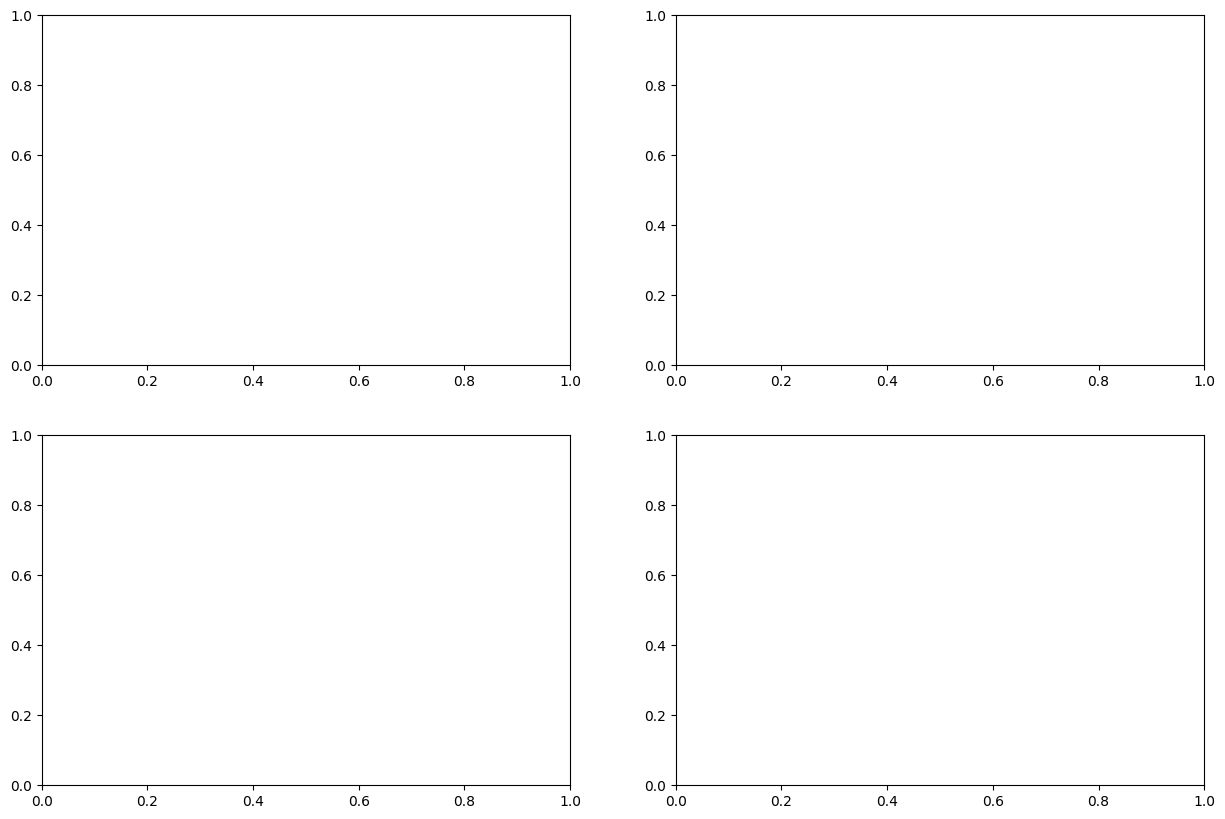

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(new[new.generator=='train1']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(new[new.generator=='train1']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])
ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(new[new.generator=='train1']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[0,1])
ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(new[new.generator=='train1']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(new[new.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


In [88]:
new_copy=new.copy()

In [99]:
only_25=new_copy.loc[(new_copy.dataset=='ames_25') | (new_copy.dataset=='bbb_martins_25') | \
                      (new_copy.dataset=='herg_karim_25') | (new_copy.dataset=='cyp1a2_veith_25') \
                        | (new_copy.dataset=='cyp2c19_veith_25')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_25')   ]
only_33=new_copy.loc[(new_copy.dataset=='ames_33') | (new_copy.dataset=='bbb_martins_33') | \
                      (new_copy.dataset=='herg_karim_33') | (new_copy.dataset=='cyp1a2_veith_33') \
                        | (new_copy.dataset=='cyp2c19_veith_33')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_33')   ]
only_40=new_copy.loc[(new_copy.dataset=='ames_40') | (new_copy.dataset=='bbb_martins_40') | \
                      (new_copy.dataset=='herg_karim_40') | (new_copy.dataset=='cyp1a2_veith_40') \
                        | (new_copy.dataset=='cyp2c19_veith_40')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_40') ]
only_50=new_copy.loc[(new_copy.dataset=='ames_50') | (new_copy.dataset=='bbb_martins_50') | \
                      (new_copy.dataset=='herg_karim_50') | (new_copy.dataset=='cyp1a2_veith_50') \
                        | (new_copy.dataset=='cyp2c19_veith_50')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_50') ]

Text(0.5, 1.0, 'Molecular Weight')

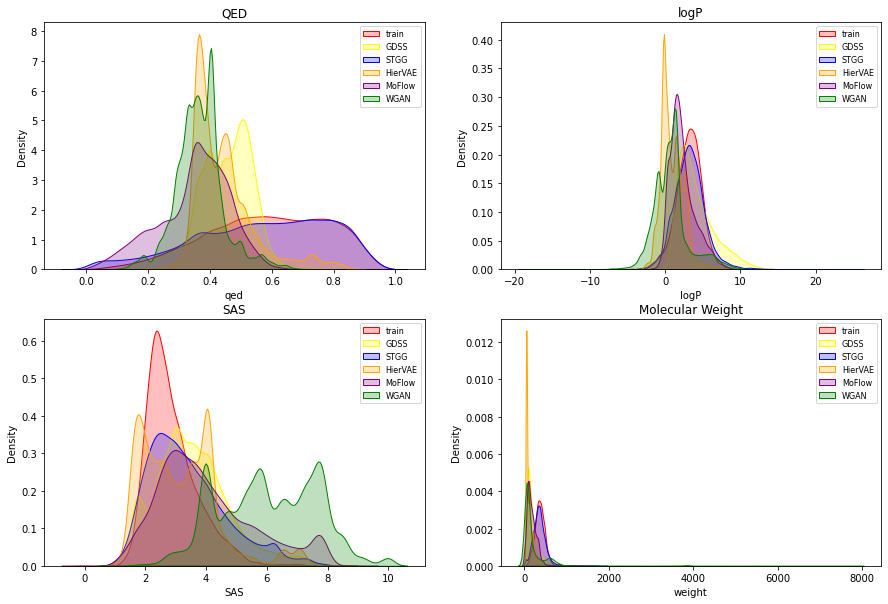

In [107]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_25[only_25.generator=='train1']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_25[only_25.generator=='train1']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_25[only_25.generator=='train1']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_25[only_25.generator=='train1']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_25[only_25.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

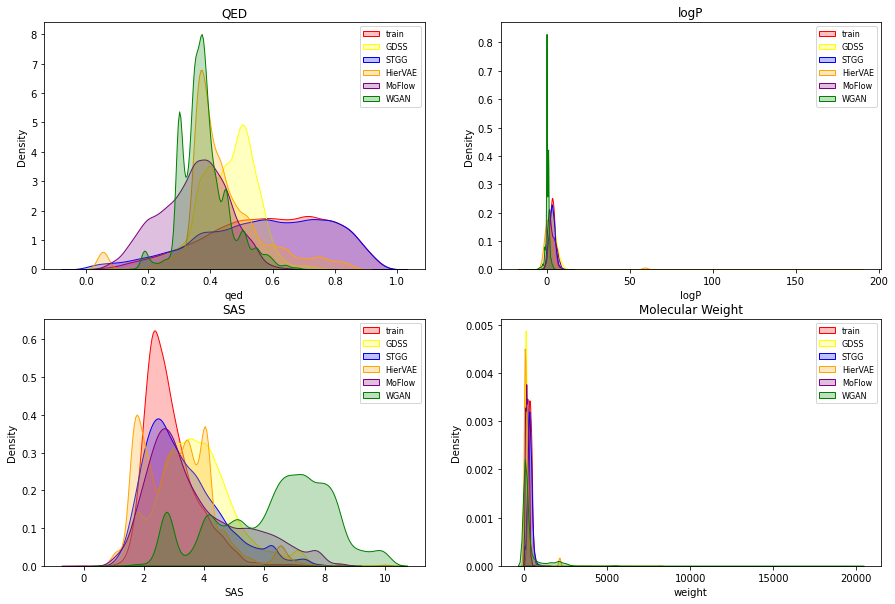

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_33[only_33.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_33[only_33.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_33[only_33.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_33[only_33.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_33[only_33.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

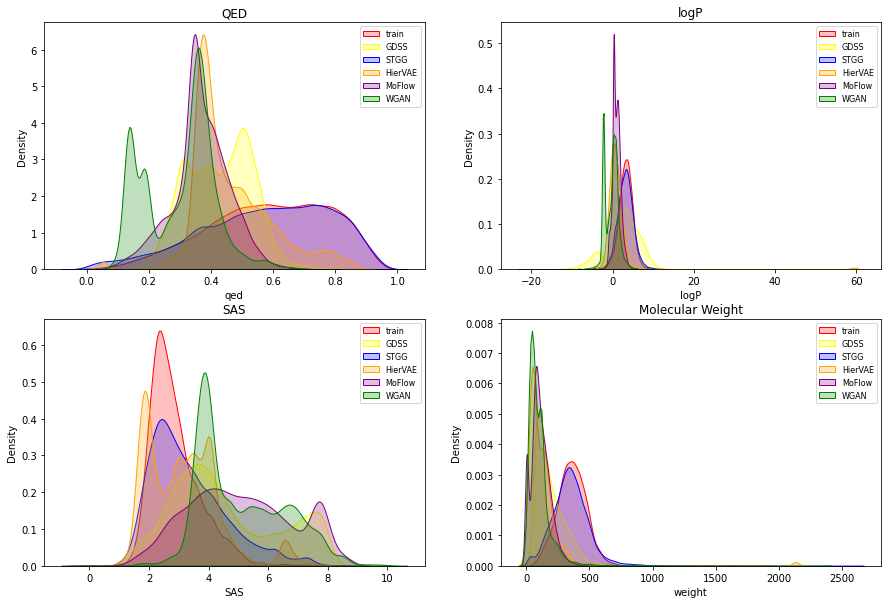

In [105]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_40[only_40.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_40[only_40.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_40[only_40.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_40[only_40.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_40[only_40.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

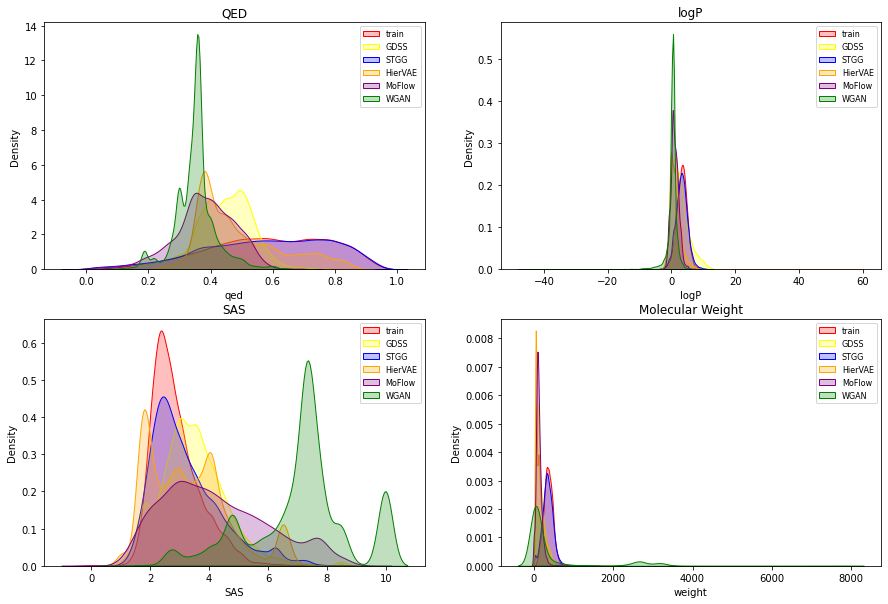

In [104]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_50[only_50.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_50[only_50.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_50[only_50.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_50[only_50.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_50[only_50.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


##  Other visualisations

In [36]:

mol_25=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
mol_25.generator_name=mol_25.generator_name+'_25'
mol_25=mol_25.groupby('generator_name').mean()


mol_33=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
mol_33.generator_name=mol_33.generator_name+'_33'
mol_33=mol_33.groupby('generator_name').mean()

mol_40=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
mol_40.generator_name=mol_40.generator_name+'_40'
mol_40=mol_40.groupby('generator_name').mean()

mol_50=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
mol_50.generator_name=mol_50.generator_name+'_50'
mol_50=mol_50.groupby('generator_name').mean()
mol_50

pd.concat([mol_25,mol_33,mol_40,mol_50]).sort_values(by=['generator_name'])

valid  unique@1000  unique@10000  FCD/Test  SNN/Test  \
generator_name                                                         
hiervae_25        1.0     0.156110      0.136675  0.177815  0.934914   
hiervae_33        1.0     0.163846      0.119039  0.143939  0.912715   
hiervae_40        1.0     0.164015      0.113478  0.164040  0.935255   
hiervae_50        1.0     0.181758      0.101911  0.139427  0.939419   
wgan_25           1.0     0.285101      0.304053  2.008752  0.505191   
wgan_33           1.0     0.361417      0.354035  3.463892  0.408294   
wgan_40           1.0     0.204679      0.236998  2.678112  0.494349   
wgan_50           1.0     0.363202      0.337372  2.310944  0.564390   

                Frag/Test  FCD/TestSF  SNN/TestSF  Frag/TestSF    IntDiv  \
generator_name                                                             
hiervae_25       0.994587   52.921050    0.066455     0.000000  0.440536   
hiervae_33       0.804154   52.952458    0.066965     0.000000  0.429437   
hiervae_40       0.663322   52.921827    0.073162     0.000000  0.402800   
hiervae_50       0.891924   52.952161    0.069098     0.000000  0.405832   
wgan_25          0.539832   52.197619    0.055233     0.000000  0.720312   
wgan_33          0.242498   52.866548    0.053476     0.166667  0.589015   
wgan_40          0.650269   52.653204    0.054557     0.000000  0.659274   
wgan_50          0.703011   51.932766    0.054410     0.000000  0.733463   

                 IntDiv2   Filters       logP        SA       QED      weight  \
generator_name                                                                  
hiervae_25      0.384259  0.992240   7.316795  0.148164  0.101546  307.177913   
hiervae_33      0.376973  0.992229   9.651380  0.193257  0.094301  355.497778   
hiervae_40      0.352725  0.995091   8.032417  0.158674  0.107727  305.788641   
hiervae_50      0.359091  0.994259   6.593971  0.131174  0.104029  279.649647   
wgan_25         0.571568  0.437957  10.086590  0.688540  0.069280  301.755486   
wgan_33         0.480968  0.365563  10.001265  0.653261  0.057969  398.740616   
wgan_40         0.514929  0.409431  10.647912  0.754229  0.071501  307.294838   
wgan_50         0.608670  0.455742   9.862614  0.720221  0.078437  468.908162   

                Novelty  
generator_name           
hiervae_25          1.0  
hiervae_33          1.0  
hiervae_40          1.0  
hiervae_50          1.0  
wgan_25             1.0  
wgan_33             1.0  
wgan_40             1.0  
wgan_50             1.0

In [206]:
molecular_metrics_to_display=['valid', 'Novelty','unique@1000', 'Frag/Test' ,'FCD/Test', 'FCD/TestSF','SNN/Test','SNN/TestSF' , 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight']
df_mean_by_generator[molecular_metrics_to_display]

valid  Novelty  unique@1000  Frag/Test      FCD/Test  \
generator_name                                                            
gdss                 1.0      1.0     0.100266   0.956553  3.363658e-01   
hiervae              1.0      1.0     0.162480   0.993450  1.583202e-01   
moflow               1.0      1.0     0.620900   0.938929  6.313038e-01   
stgg                 1.0      1.0     0.778605   0.999717  3.597238e-03   
train1               1.0      1.0     0.818481   1.000000 -6.335120e-08   
train1/2+train2/2    1.0      1.0     0.807535   0.999988  1.283450e-03   
train2               1.0      1.0     0.802442   0.999976  2.497879e-03   
wgan                 1.0      1.0     0.305314   0.390920  2.640481e+00   

                   FCD/TestSF  SNN/Test  SNN/TestSF    IntDiv   IntDiv2  \
generator_name                                                            
gdss                53.346986  0.770973    0.047427  0.179297  0.145936   
hiervae             52.934602  0.930503    0.068938  0.418676  0.367255   
moflow              52.142548  0.735833    0.068991  0.674551  0.621237   
stgg                53.025739  0.996328    0.089129  0.319452  0.297746   
train1              53.038169  1.000000    0.089791  0.315155  0.294377   
train1/2+train2/2   53.031075  0.998390    0.089729  0.316387  0.295550   
train2              53.026236  0.997570    0.089644  0.318105  0.297097   
wgan                52.399314  0.493696    0.054376  0.674167  0.544385   

                    Filters       logP        SA       QED      weight  
generator_name                                                          
gdss               0.955004   4.336116  0.295364  0.089063  243.442162  
hiervae            0.993862   7.903402  0.157197  0.101708  312.460260  
moflow             0.482847   7.358676  0.574802  0.095736  224.483915  
stgg               0.978244   0.800831  0.025771  0.017339   31.792756  
train1             0.975788   0.000000  0.000000  0.000000    0.000000  
train1/2+train2/2  0.975075   0.131067  0.007149  0.003604    5.201379  
train2             0.975579   0.157312  0.008369  0.004271    6.620743  
wgan               0.418446  10.151429  0.707888  0.069168  370.350624

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


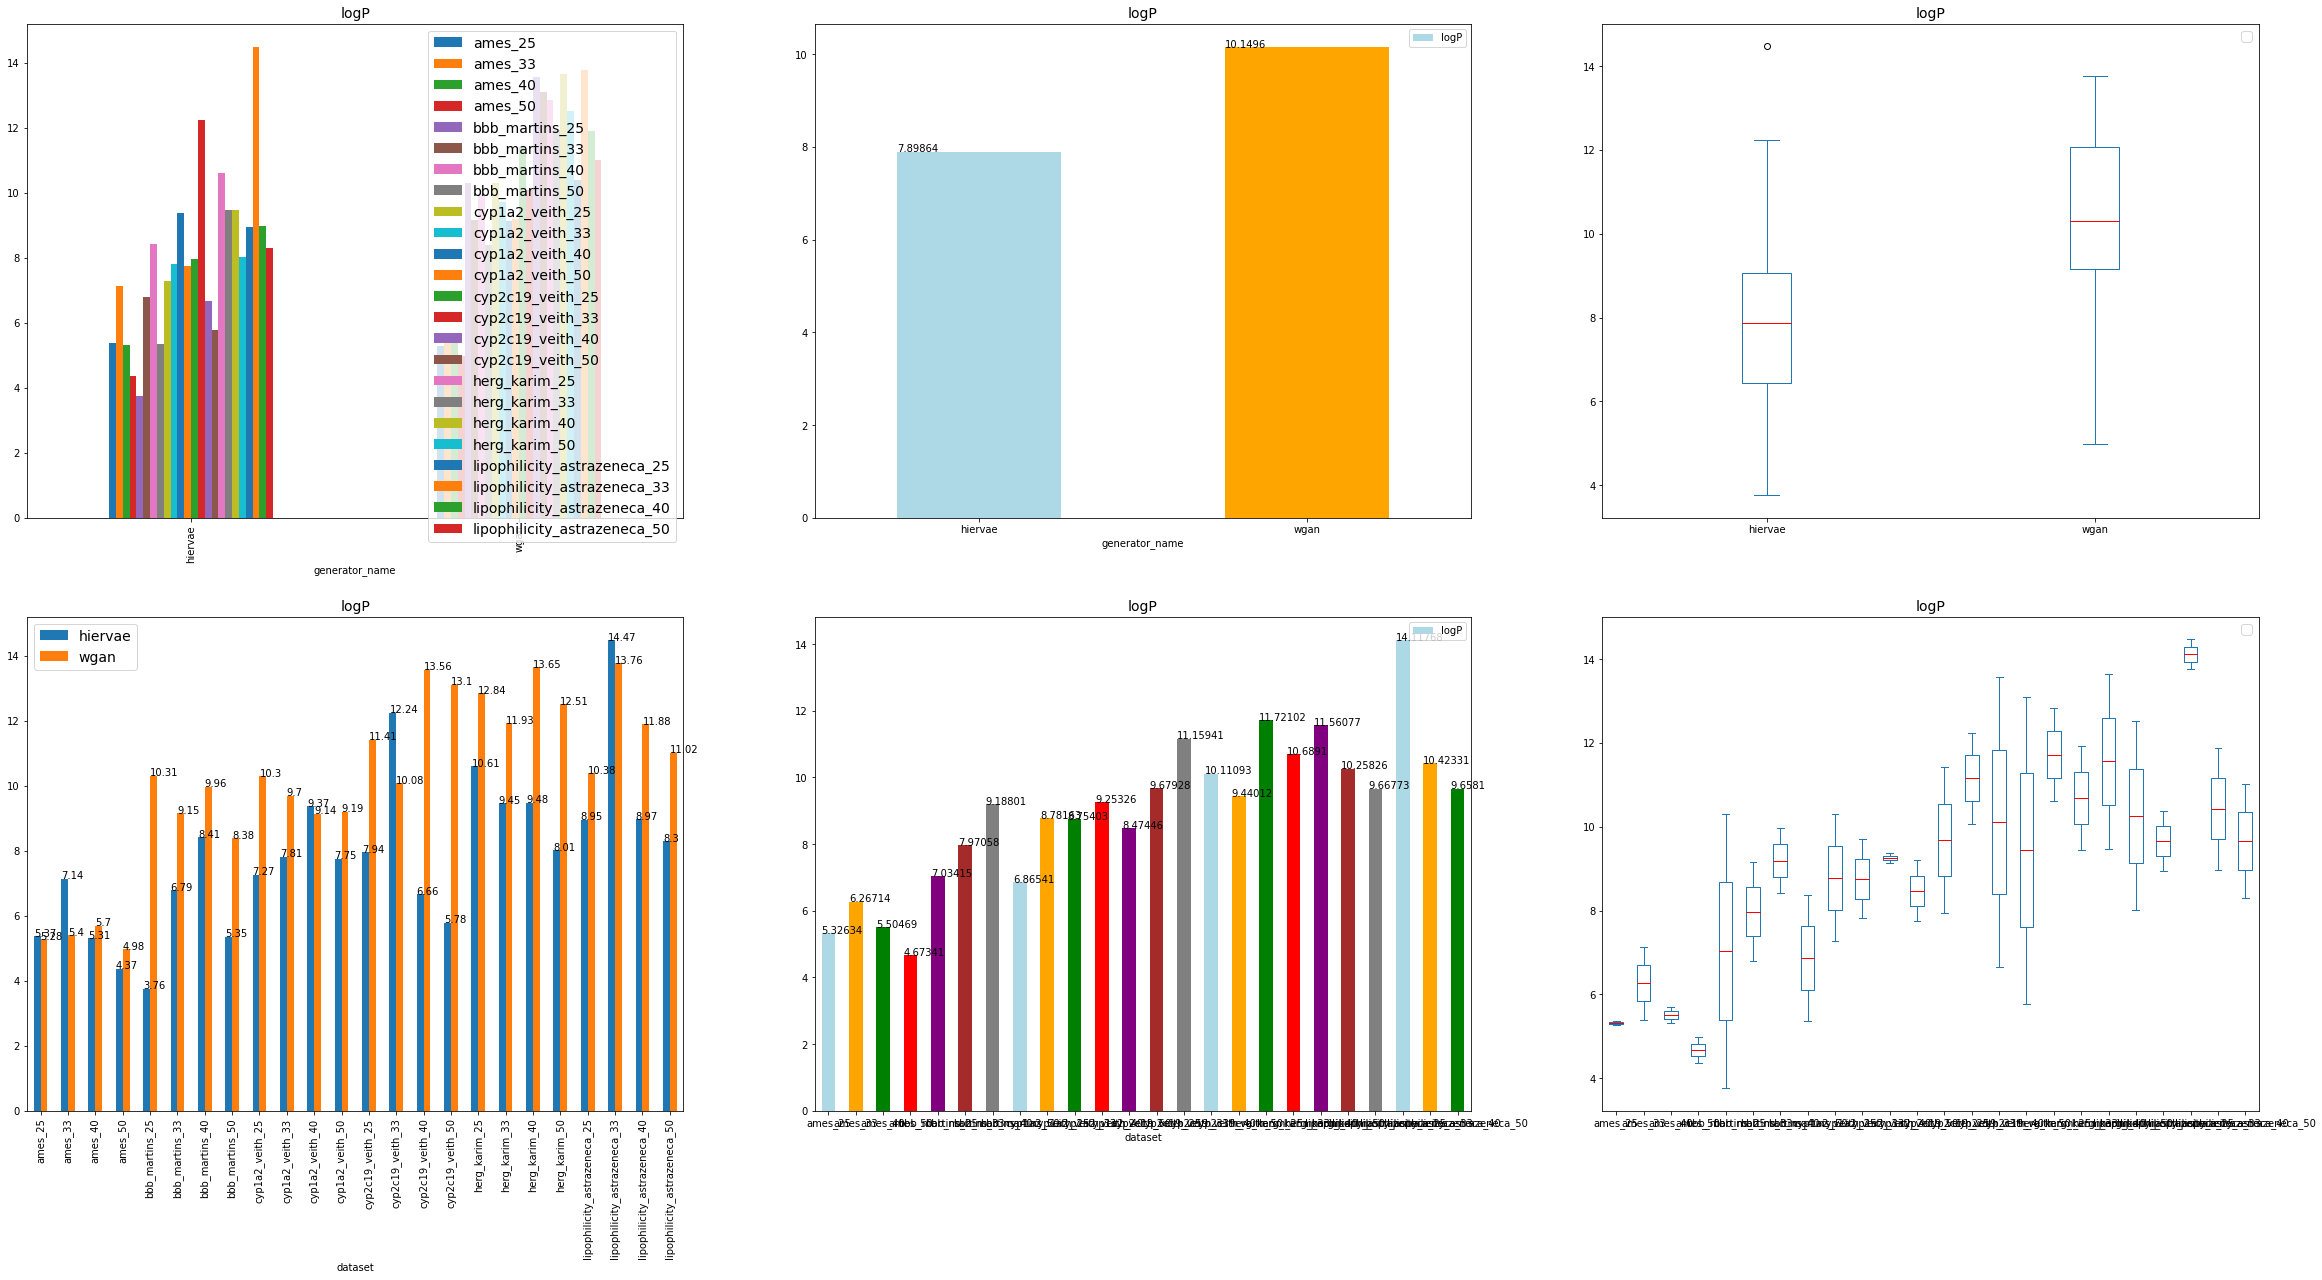

In [24]:
look_at_data_according_to_a_metric('logP')


# NN_based metrics

In [25]:
df_mean_by_generator[nn_metrics]

precision   density    recall  coverage     f1_pr     f1_dc  \
generator_name                                                                
hiervae          0.712690  0.451874  0.149647  0.047865  0.196885  0.083769   
wgan             0.452498  0.183245  0.138689  0.016240  0.116407  0.029043   

                         fid           kid    mmd_linear   mmd_rbf  
generator_name                                                      
hiervae         6.692809e+02  2.043760e+07  1.705864e+02  0.771134  
wgan            6.764531e+08  1.145669e+23  3.005261e+06  0.574830

In [26]:

nn_25=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

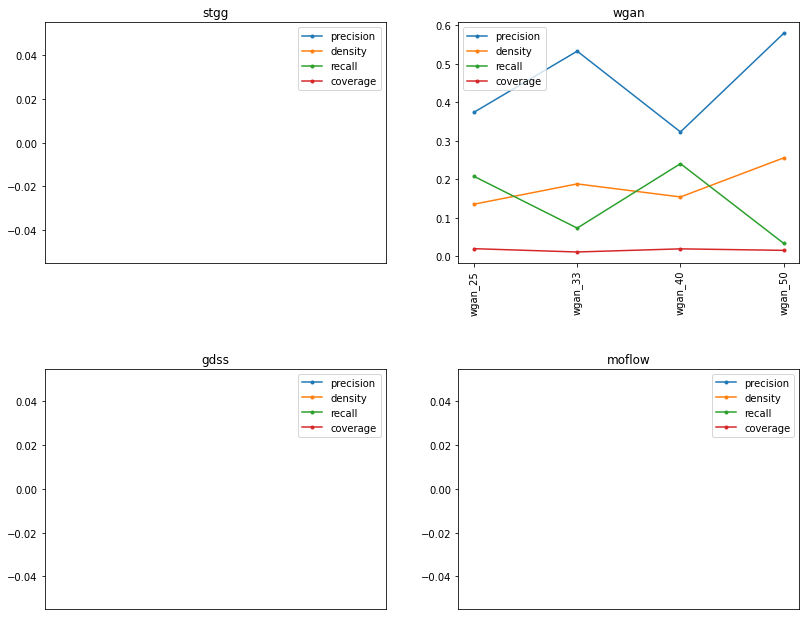

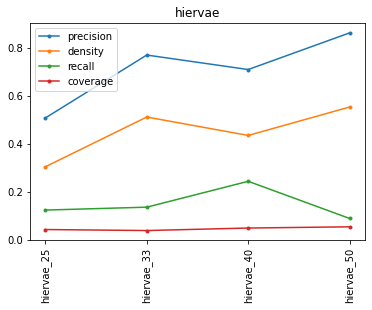

In [27]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))

df3_stgg[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['precision',	'density',	'recall',	'coverage'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')




[Text(20, 0, 'wgan_25'),
 Text(21, 0, 'wgan_33'),
 Text(22, 0, 'wgan_40'),
 Text(23, 0, 'wgan_50')]

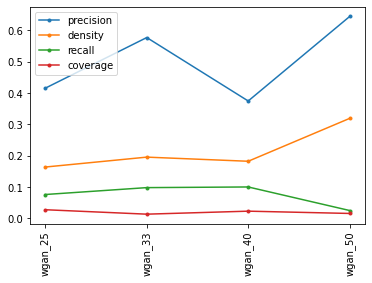

# Structural metrics



In [28]:
df_mean_by_generator[structural_metrics]

wl_mmd  nspdk_mmd
generator_name                     
hiervae         0.300559   0.150640
wgan            0.934989   0.379886

In [29]:

nn_25=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

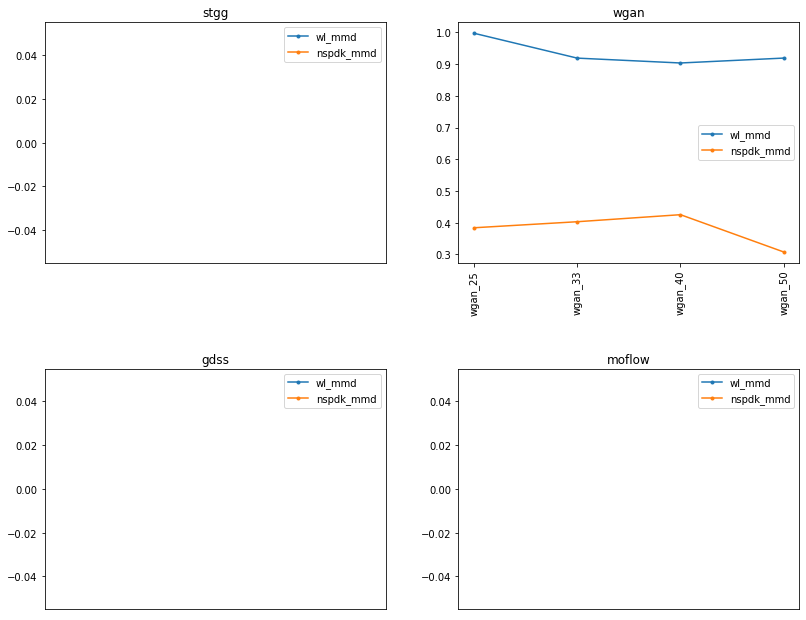

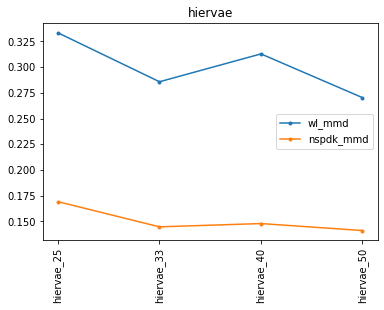

In [30]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))
df3_stgg[[	'wl_mmd',	'nspdk_mmd']].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['wl_mmd',	'nspdk_mmd'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


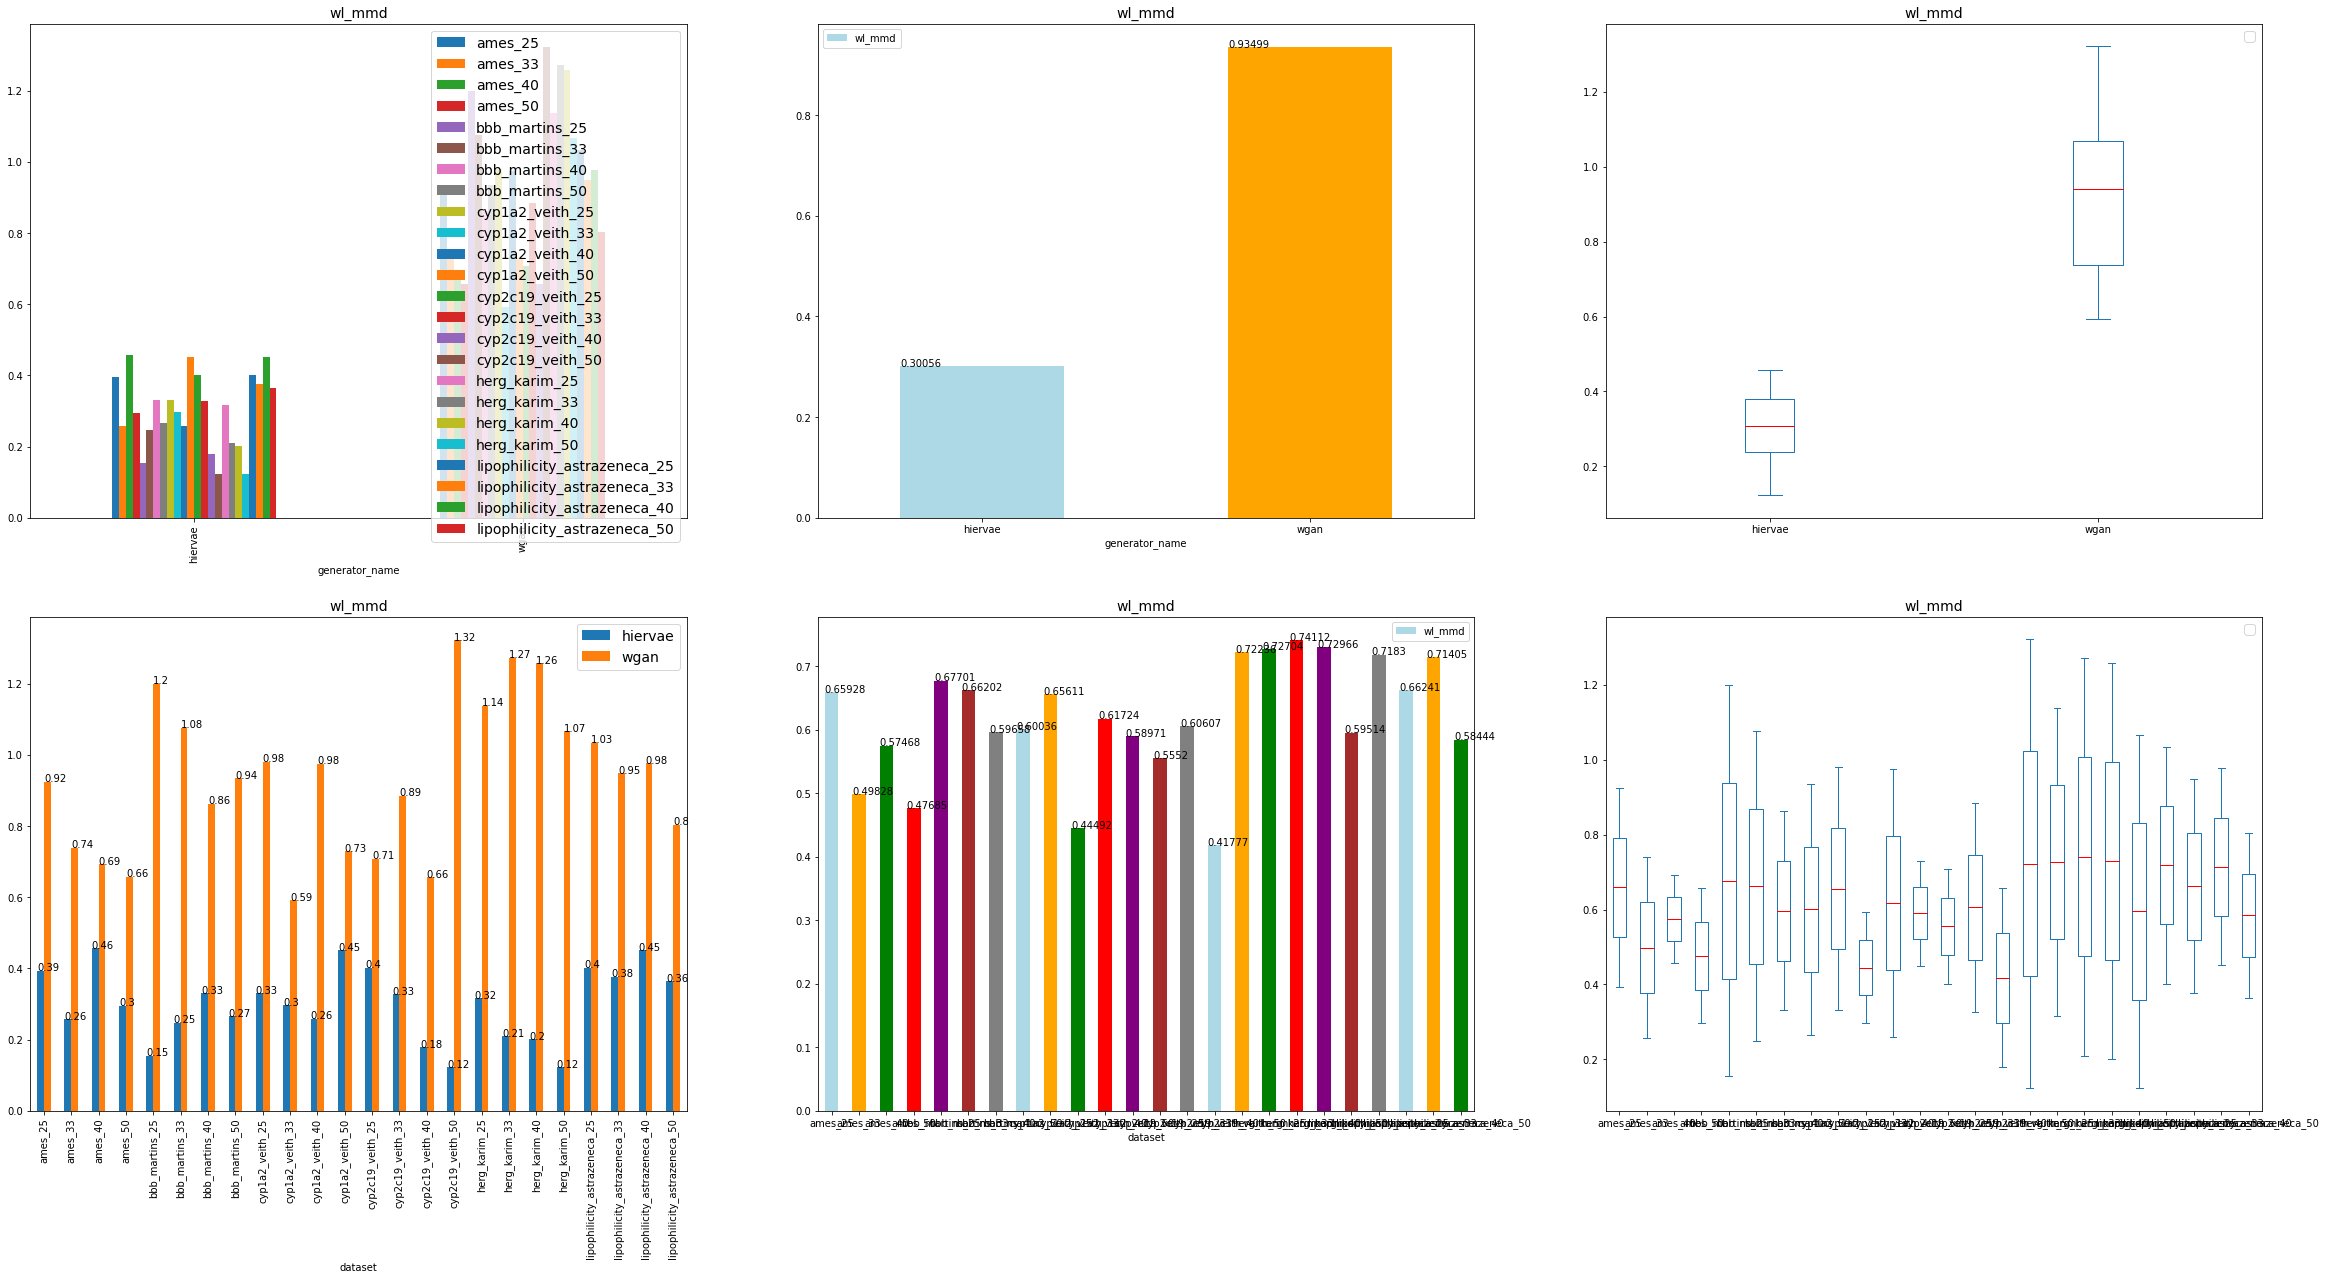

In [31]:
look_at_data_according_to_a_metric('wl_mmd')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


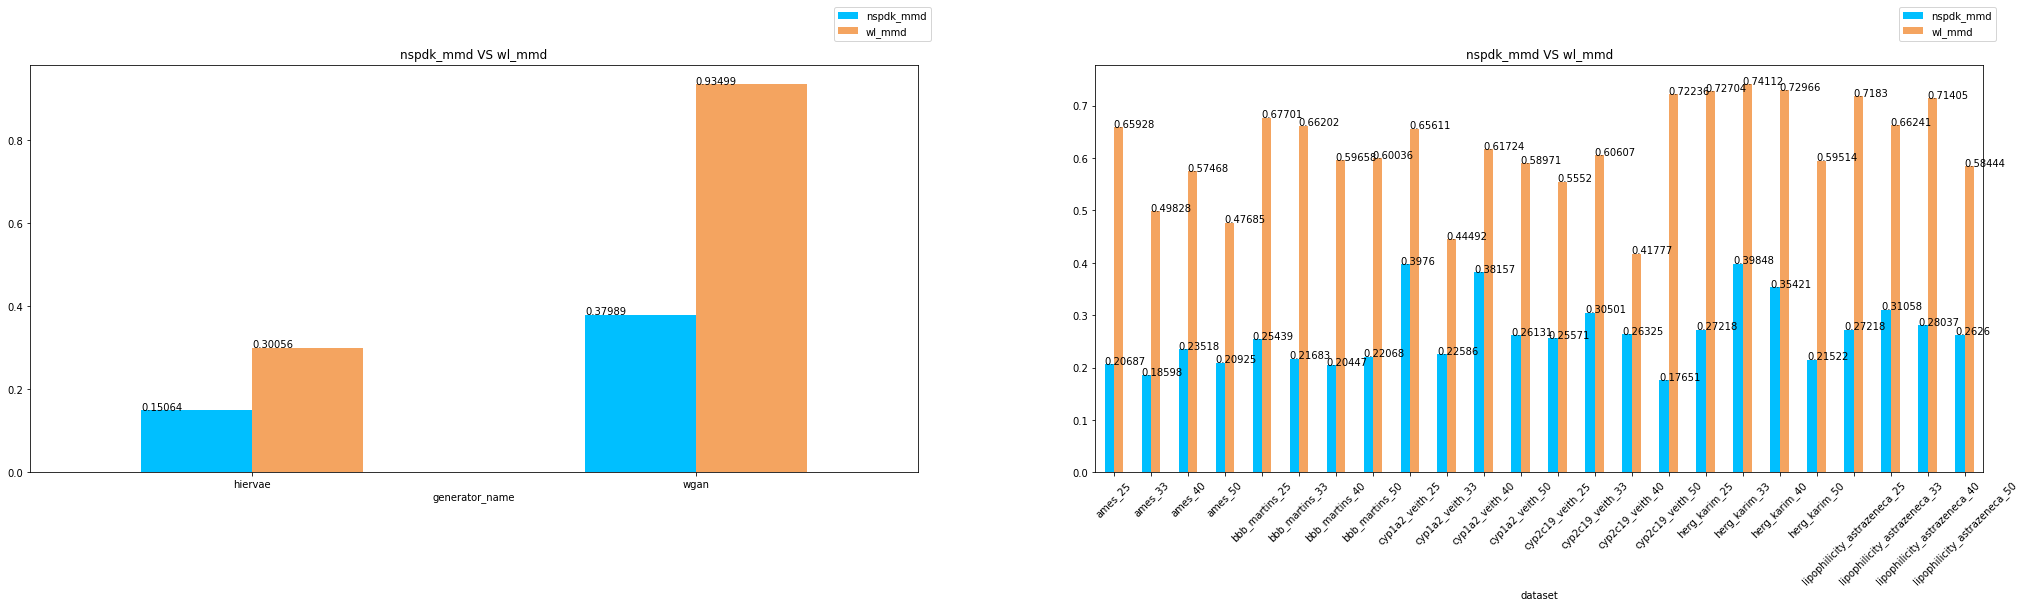

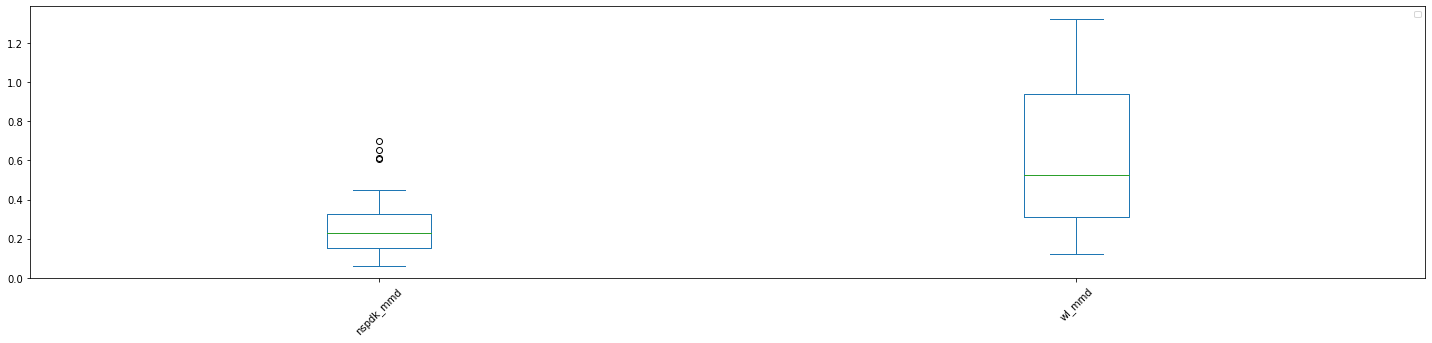

In [32]:
compare_two_metrics('nspdk_mmd','wl_mmd')


#Draft section